In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.types import *
from pyspark.sql.window import Window
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder.getOrCreate()

23/03/20 08:01:56 WARN Utils: Your hostname, Davis-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.102 instead (on interface en0)
23/03/20 08:01:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/20 08:01:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# Descriptive Analysis

In [2]:
df = spark.read.parquet("../Uber_Lyft_Cab_prices/df_final.parquet")

In [3]:
df.count()

1164996

In [6]:
df_mean_cab_type = (df
                    .groupBy(["cab_type", "name", "product_id"])
                    .agg(f.mean("price").alias("mean_price"))
                    .orderBy("mean_price")
                    )
df_mean_cab_type.show()

+--------+------------+--------------------+------------------+
|cab_type|        name|          product_id|        mean_price|
+--------+------------+--------------------+------------------+
|    Lyft|      Shared|           lyft_line| 6.011945137689042|
|    Uber|    UberPool|997acbb5-e102-41e...| 8.761369295432361|
|    Lyft|        Lyft|                lyft| 9.601355686683851|
|    Uber|         WAV|9a0e7b09-b92b-4c4...| 9.773517865129454|
|    Uber|       UberX|55c66225-fbe7-4fd...| 9.775111133310025|
|    Lyft|     Lyft XL|           lyft_plus|15.316675768575928|
|    Uber|      UberXL|6f72dfc5-27f1-42e...|15.658716624198139|
|    Lyft|         Lux|        lyft_premier| 17.76936149291379|
|    Uber|       Black|6c84fd89-3f11-478...|20.534069553520208|
|    Lyft|   Lux Black|            lyft_lux|  23.0736809468316|
|    Uber|   Black SUV|6d318bcc-22a3-4af...|30.264864328587727|
|    Lyft|Lux Black XL|         lyft_luxsuv| 32.36325923775111|
+--------+------------+-----------------

In [4]:
cab_type_distinct = df.select("cab_type").distinct().collect()
cab_type_distinct = [row.cab_type for row in cab_type_distinct]
cab_type_distinct

['Lyft', 'Uber']

### Categorical Study

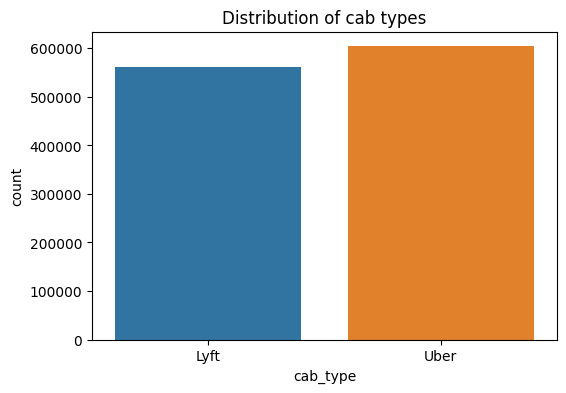

In [5]:
plt.figure(figsize=(6, 4))
sns.barplot(x="cab_type", y="count", data=df.groupBy("cab_type").count().toPandas())
plt.title("Distribution of cab types")
plt.show()

In [6]:
destinations = df.select("destination").distinct().collect()
destinations = [row.destination for row in destinations]
len(destinations)

12

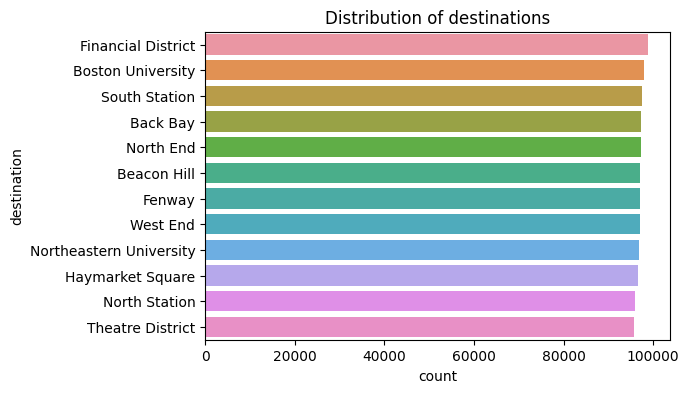

In [7]:
each_destination = df.groupBy("destination").count().orderBy("count", ascending=False).toPandas()
plt.figure(figsize=(6, 4))
sns.barplot(x="count", y="destination", data=each_destination)
plt.title("Distribution of destinations")
plt.show()

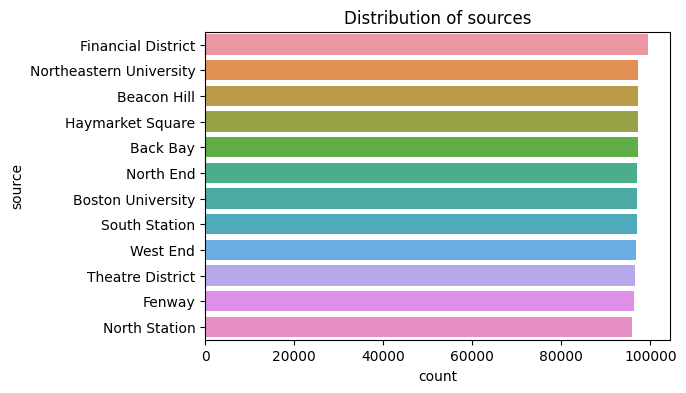

In [9]:
each_source = df.groupBy("source").count().orderBy("count", ascending=False).toPandas()
plt.figure(figsize=(6, 4))
sns.barplot(x="count", y="source", data=each_source)
plt.title("Distribution of sources")
plt.show()

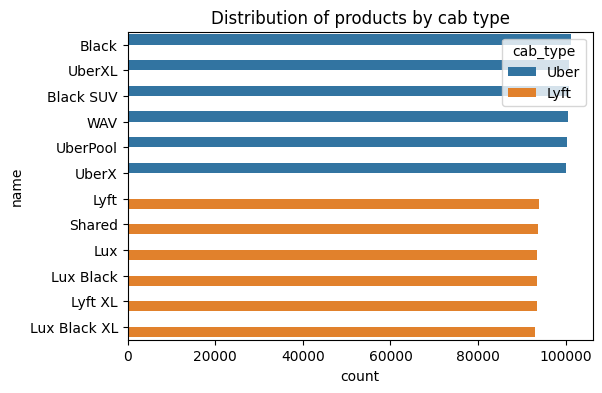

In [10]:
product_by_cab = df.groupBy("cab_type", "name").count().orderBy("count", ascending=False).toPandas()
plt.figure(figsize=(6, 4))
sns.barplot(x="count", y="name", hue="cab_type", data=product_by_cab)
plt.title("Distribution of products by cab type")
plt.show()

### Distributions

<Figure size 600x400 with 0 Axes>

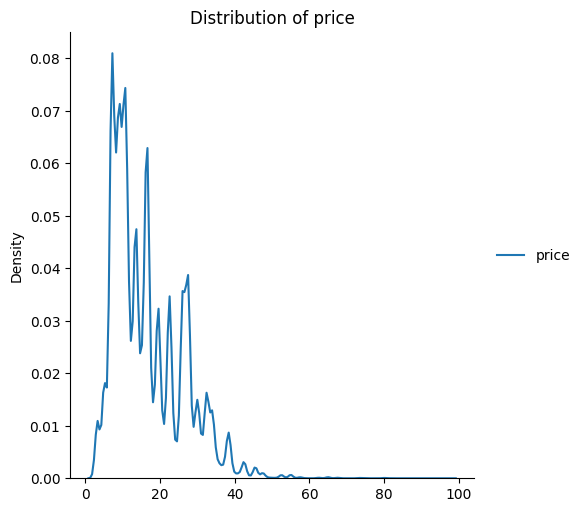

In [11]:
plt.figure(figsize=(6, 4))
sns.displot(df.select("price").toPandas(), kind="kde")
plt.title("Distribution of price")
plt.show()

<Figure size 600x400 with 0 Axes>

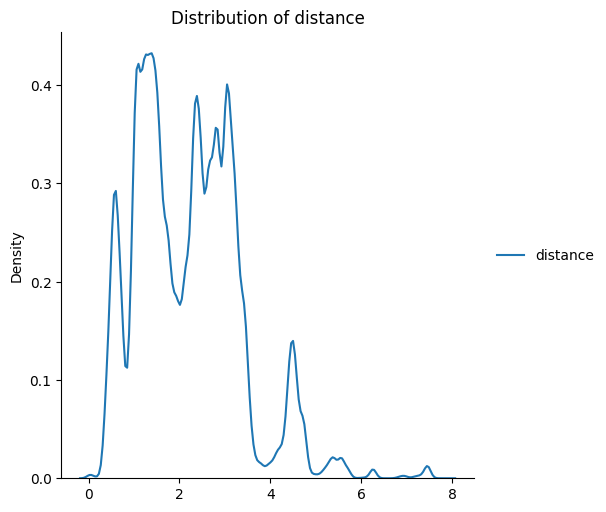

In [12]:
plt.figure(figsize=(6, 4))
sns.displot(df.select("distance").toPandas(), kind="kde")
plt.title("Distribution of distance")
plt.show()

<Figure size 600x400 with 0 Axes>

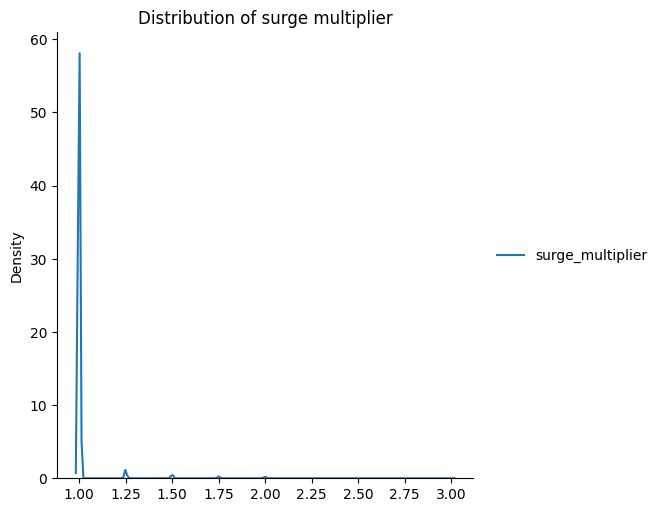

In [13]:
plt.figure(figsize=(6, 4))
sns.displot(df.select("surge_multiplier").toPandas(), kind="kde")
plt.title("Distribution of surge multiplier")
plt.show()

### Time variables

<Figure size 600x400 with 0 Axes>

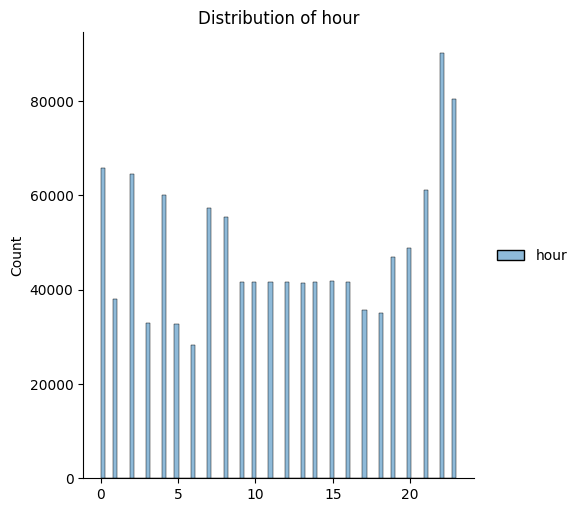

In [14]:
plt.figure(figsize=(6, 4))
sns.displot(df.select("hour").toPandas())
plt.title("Distribution of hour")
plt.show()

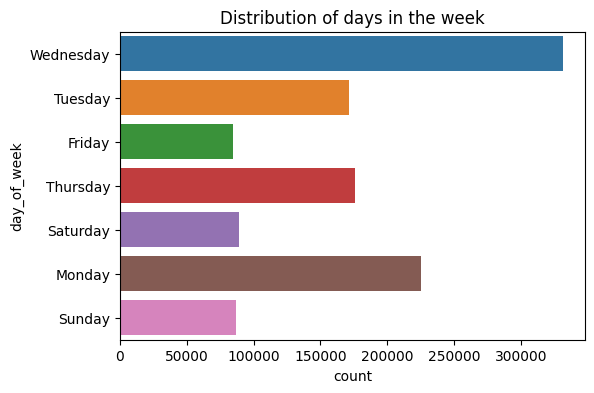

In [15]:
day_of_week = df.groupBy("day_of_week").count().toPandas()
plt.figure(figsize=(6, 4))
sns.barplot(x="count", y="day_of_week", data=day_of_week)
plt.title("Distribution of days in the week")
plt.show()

### Weather variables

[Text(0.5, 1.0, 'Distribution of rain')]

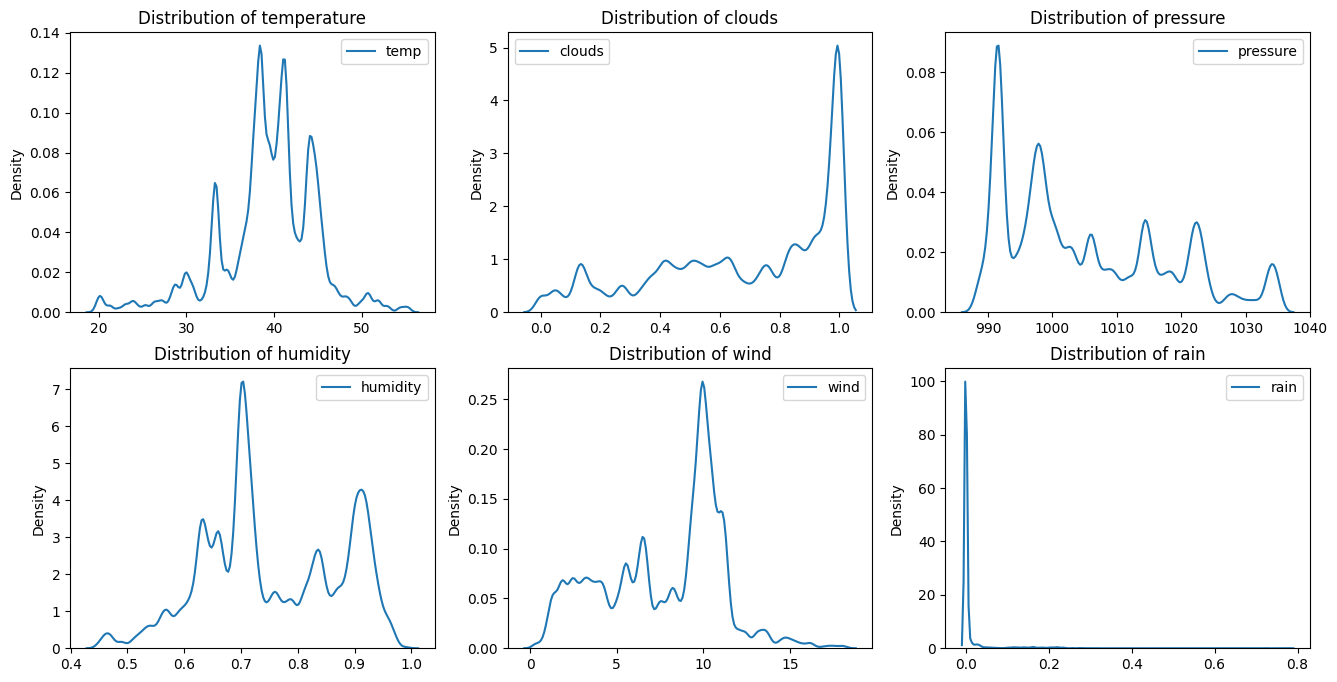

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
sns.kdeplot(df.select("temp").toPandas(), ax=ax[0, 0]).set(title="Distribution of temperature")
sns.kdeplot(df.select("clouds").toPandas(), ax=ax[0, 1]).set(title="Distribution of clouds")
sns.kdeplot(df.select("pressure").toPandas(), ax=ax[0, 2]).set(title="Distribution of pressure")
sns.kdeplot(df.select("humidity").toPandas(), ax=ax[1, 0]).set(title="Distribution of humidity")
sns.kdeplot(df.select("wind").toPandas(), ax=ax[1, 1]).set(title="Distribution of wind")
sns.kdeplot(df.select("rain").toPandas(), ax=ax[1, 2]).set(title="Distribution of rain")